In [1]:
import os
import numpy as np
import pandas as pd
import re
from collections import defaultdict

In [2]:
file = open(os.getcwd() + '/spam.txt', "r")

data = []
for line in file:
    line = re.sub('[.,\n"&()\']','',line)
    line = re.sub('\s+',' ',line)
    data.append(line)

label = []
message = []
for i in range(len(data)):
    idx = data[i].find(' ')
    label.append(data[i][:idx])
    message.append(data[i][idx+1:])

count = len(message)
idx = int(count*.8)
test_message = message[idx:]
test_label = label[idx:]
label = label[:idx]
message = message[:idx]

In [3]:
mp = defaultdict(dict)
count_spam = 0
count_ham = 0

for i in range(len(message)):
    
    if label[i]=='ham':
        count_ham+=1
    else:
        count_spam+=1
        
    words = message[i].split(' ')
    for w in words:
        try:
            mp[label[i]][w]+=1
        except KeyError:
            mp[label[i]][w]=1


In [4]:
print(count_spam)
print(count_ham)

602
3856


In [5]:
ans = defaultdict(dict)

for idx in range(len(test_message)):
    prob_ham = 1.0
    prob_spam = 1.0
    
    words = test_message[idx].split()
    for w in words:
        try:
            mp['ham'][w]+=0
        except KeyError:
            mp['ham'][w]=0
        prob_ham*=(mp['ham'][w]+1/count_ham)
        
        try:
            mp['spam'][w]+=0
        except KeyError:
            mp['spam'][w]=0
        prob_spam*=(mp['spam'][w]+1/count_spam)
    
    if prob_ham > prob_spam:
        tmp = 'ham'
        
    else:
        tmp = 'spam'
    try:
        ans[test_label[idx]][tmp]+=1
    except KeyError:
        ans[test_label[idx]][tmp]=1   
    

ham ham 955
ham spam 14
spam ham 16
spam spam 129


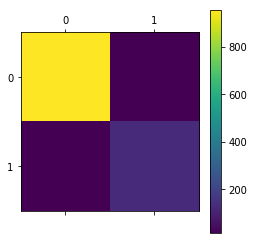

Accuracy : 97.21973094170404


In [9]:
import matplotlib.pyplot as plt

val = 0
arr = []
for i in {'ham', 'spam'}:
    tmp =[]
    for j in {'ham', 'spam'}:
        try:
            x = ans[i][j]
        except KeyError:
            x = 0
        if i==j:
            val+=x
        tmp.append(x)
        print(i,j,x)
    arr.append(tmp)
plt.matshow(arr)
plt.colorbar()
plt.show()
print("Accuracy : " + str(val*100/len(test_message)))        